### **Understanding Missing Values in Feature Engineering**

When working with real-world data, missing values are a common problem. In feature engineering, handling missing values correctly is crucial because they can affect the performance of machine learning models.

## **Types of Missing Values**
Missing values can be categorized into three main types:

### **1. Missing Completely at Random (MCAR)**
- The missing values occur randomly and have no relationship with any other variable in the dataset.
- Example: A person forgets to fill in their age in a survey.
- **Effect:** No bias is introduced, and dropping missing values or imputing them with a simple method like mean/median is usually fine.

### **2. Missing at Random (MAR)**
- The missing values are related to other observed variables but not to the missing data itself.
- Example: In a medical dataset, men are more likely to skip answering a question about weight, but within each gender, weight is missing randomly.
- **Effect:** More advanced imputation methods like regression or using related features to fill in the missing values can be useful.

### **3. Missing Not at Random (MNAR)**
- The missing values depend on the unobserved data itself, meaning the reason for missingness is not random.
- Example: People with higher incomes may choose not to report their salaries in a survey.
- **Effect:** This can introduce bias, and handling MNAR often requires domain knowledge or special techniques like modeling the missingness separately.

## **Handling Missing Values in Feature Engineering**
Once we identify the type of missing values, we can decide how to handle them:

### **1. Removing Missing Values (If Missing is Low)**
- If a feature has very few missing values (e.g., <5% of the dataset), simply removing those rows may not impact the model significantly.
- Example:

   ```python
  df.dropna(inplace=True)
  ```

### **2. Imputation (Filling Missing Values)**

- **Mean/Median/Mode Imputation**: Replacing missing values with the mean (for numerical data), median (for skewed numerical data), or mode (for categorical data).

  ```python
  df['Age'].fillna(df['Age'].mean(), inplace=True)  # Mean Imputation
  ```
  
- **Forward or Backward Fill**: Filling missing values using previous or next available values (good for time series data).

  ```python
  df.fillna(method='ffill', inplace=True)  # Forward fill
  ```
- **Predictive Imputation**: Using models like regression or KNN to estimate missing values.

  ```python
  from sklearn.impute import KNNImputer
  imputer = KNNImputer(n_neighbors=3)
  df[['Age', 'Salary']] = imputer.fit_transform(df[['Age', 'Salary']])
  ```

### **3. Adding Missing Indicators**
- Instead of filling missing values, we can create a new column that flags whether a value was missing.

   ```python
  df['Age_missing'] = df['Age'].isnull().astype(int)
  ```

### **4. Using Domain Knowledge**
- In cases of MNAR, sometimes domain expertise can help us decide on the best approach.
- Example: If missing income values indicate high salaries, we might group them as "high income" instead of just imputing with the mean.

## **Summary**

| Type of Missing Data | Example | Best Handling Methods |
|----------------------|---------|----------------------|
| **MCAR** | Randomly missing age values in a survey | Drop rows or use simple imputation |
| **MAR** | Missing income values depend on education level | Use regression or related features for imputation |
| **MNAR** | High earners not reporting salaries | Use domain knowledge or model missingness |

### **Final Tip:**  
Before deciding how to handle missing values, always **explore your data** to understand the reason behind the missingness. Proper handling can significantly improve your machine learning model's accuracy!

In [1]:
import seaborn as sns

In [2]:
df=sns.load_dataset('titanic')

In [3]:
df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [4]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
df.shape

(891, 15)

In [6]:
df.dropna().shape

(182, 15)

In [7]:
## Column deletion
df.dropna(axis=1)

survived  pclass     sex  sibsp  parch     fare   class    who  \
0           0       3    male      1      0   7.2500   Third    man   
1           1       1  female      1      0  71.2833   First  woman   
2           1       3  female      0      0   7.9250   Third  woman   
3           1       1  female      1      0  53.1000   First  woman   
4           0       3    male      0      0   8.0500   Third    man   
..        ...     ...     ...    ...    ...      ...     ...    ...   
886         0       2    male      0      0  13.0000  Second    man   
887         1       1  female      0      0  30.0000   First  woman   
888         0       3  female      1      2  23.4500   Third  woman   
889         1       1    male      0      0  30.0000   First    man   
890         0       3    male      0      0   7.7500   Third    man   

     adult_male alive  alone  
0          True    no  False  
1         False   yes  False  
2         False   yes   True  
3         False   yes  False  
4          True    no   True  
..          ...   ...    ...  
886        True    no   True  
887       False   yes   True  
888       False    no  False  
889        True   yes   True  
890        True    no   True  

[891 rows x 11 columns]

In [8]:
#imputation

In [9]:
# mean imputation

<Axes: xlabel='age', ylabel='Count'>

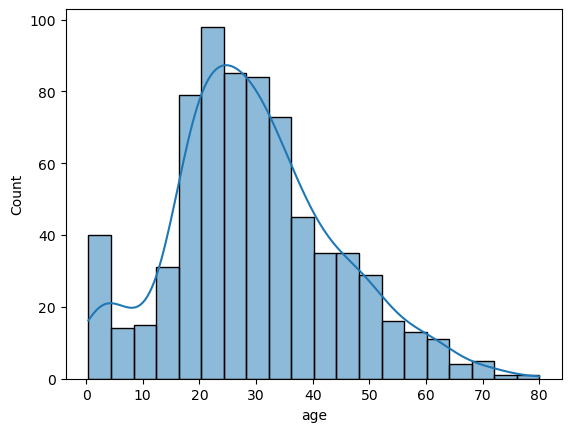

In [10]:
sns.histplot(df['age'],kde=True)

In [11]:
df['Age_mean']=df['age'].fillna(df['age'].mean())

In [12]:
df[['Age_mean','age']]

Age_mean   age
0    22.000000  22.0
1    38.000000  38.0
2    26.000000  26.0
3    35.000000  35.0
4    35.000000  35.0
..         ...   ...
886  27.000000  27.0
887  19.000000  19.0
888  29.699118   NaN
889  26.000000  26.0
890  32.000000  32.0

[891 rows x 2 columns]

In [15]:
## mean imputation works if data is distributed normally but if we have outliers then solution -> median imputation

In [16]:
df['age_median']=df['age'].fillna(df['age'].median())

In [17]:
df[['age_median','Age_mean','age']]

age_median   Age_mean   age
0          22.0  22.000000  22.0
1          38.0  38.000000  38.0
2          26.0  26.000000  26.0
3          35.0  35.000000  35.0
4          35.0  35.000000  35.0
..          ...        ...   ...
886        27.0  27.000000  27.0
887        19.0  19.000000  19.0
888        28.0  29.699118   NaN
889        26.0  26.000000  26.0
890        32.0  32.000000  32.0

[891 rows x 3 columns]

In [18]:
# mode imputation -> categorical values

In [19]:
df[df['embarked'].isnull()]

survived  pclass     sex   age  sibsp  parch  fare embarked  class  \
61          1       1  female  38.0      0      0  80.0      NaN  First   
829         1       1  female  62.0      0      0  80.0      NaN  First   

       who  adult_male deck embark_town alive  alone  Age_mean  age_median  
61   woman       False    B         NaN   yes   True      38.0        38.0  
829  woman       False    B         NaN   yes   True      62.0        62.0

In [20]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [21]:
mode_value=df[df['embarked'].notna()]['embarked'].mode()[0]

In [22]:
mode_value

'S'

In [23]:
df['embarked_mode']=df['embarked'].fillna(mode_value)

In [24]:
df[['embarked_mode','embarked']]

embarked_mode embarked
0               S        S
1               C        C
2               S        S
3               S        S
4               S        S
..            ...      ...
886             S        S
887             S        S
888             S        S
889             C        C
890             Q        Q

[891 rows x 2 columns]

In [25]:
df['embarked'].isnull().sum()

2

In [26]:
df['embarked_mode'].isnull().sum()

0